# Solution

Obtaining a realistic model of the tropospheric delay is one of the main challenges when processing raw GNSS observations. One way to handle this delay is to assume it behaves like a stochastic process and use a Kalman filter to provide an estimate of the delay.

### Random walk
Assume that the tropospheric delay can be modeled as random walk (i.e. integrated white noise).

In [1]:
from sympy import symbols, inverse_laplace_transform

beta, s, t = symbols('beta s t', positive=True)

inverse_laplace_transform(1/(s+beta), s, t)

exp(-beta*t)

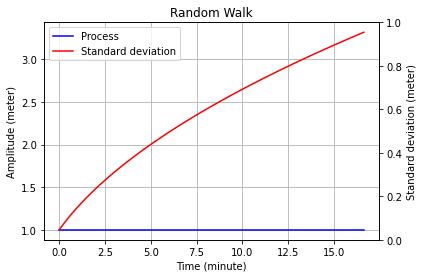

In [2]:
from numpy import sqrt, arange, array
import matplotlib.pyplot as plt
from vanloan import numeval

# System values
samples = 1000
dt = 1           # second

# Process values
q = 0.01         # meter^2/second

# Initial values
x = array([[1]])
P = array([[1**2]])

# Plot vectors
proc = []; std = []

# Dynamic matrix
F = array([[0]])

# White noise coefficients
G = array([[sqrt(q)]])

# Van Loan
[phi, Q] = numeval(F, G, dt)

# KF main loop
for k in range(0, samples):
    
    # Time update
    x = phi@x
    P = phi@P@phi.T + Q

    # Accumulate plot vectors
    proc.append(x[0, 0])
    std.append(sqrt(P[0, 0]))

# Time
time = arange(0, samples)/60   # minute

# Plotting process
fig, ax1 = plt.subplots()
plt.plot(time, proc, 'b', label='Process')
plt.plot(time, std, 'r', label='Standard deviation')
plt.title('Random Walk')
ax1.set_xlabel('Time (minute)')
ax1.set_ylabel('Amplitude (meter)')

ax2 = ax1.twinx()
ax2.set_ylabel('Standard deviation (meter)')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
ax1.grid()

plt.show()

### First order Gauss-Markov

A more realistic model would be to assume that the tropospheric delay can be modeled as a first order Gauss Markov process.

The corresponding Power Spectral Density $S_X$ and autocorrelation $R_X$ is given as follows:

\begin{equation}
  S_X=\frac{2\sigma^2\beta}{-s^2+\beta^2} \rightarrow R_X=\sigma^2 e^{-\beta|\tau|}
\end{equation}

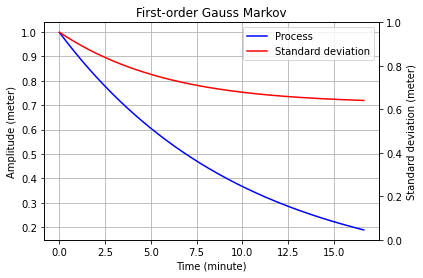

In [3]:
# System values
samples = 1000
dt = 1          # second

# Process values
sigma2 = 0.5    # meter^2
beta = 0.1/60   # rad/second

# Initial values
x = array([[1]])
P = array([[1**2]])

# Plot vectors
proc = []; std = []

# Dynamic matrix
F = array([[-beta]])

# White noise coefficients
G = array([[sqrt(2*sigma2*beta)]])

# Van Loan
[phi, Q] = numeval(F, G, dt)

# KF main loop
for k in range(0, samples):
    
    # Time update
    x = phi@x
    P = phi@P@phi.T + Q

    # Accumulate plot vectors
    proc.append(x[0, 0])
    std.append(sqrt(P[0, 0]))

# Time
time = arange(0, samples)/60  # minute

# Plotting process
fig, ax1 = plt.subplots()
plt.plot(time, proc, 'b', label='Process')
plt.plot(time, std, 'r', label='Standard deviation')
plt.title('First-order Gauss Markov')
ax1.set_xlabel('Time (minute)')
ax1.set_ylabel('Amplitude (meter)')

ax2 = ax1.twinx()
ax2.set_ylabel('Standard deviation (meter)')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
ax1.grid()

plt.show()

In [4]:
print("The process value is", "{:.1f}%".format(proc[600]*100), "of the original value after one time constant")

The process value is 36.7% of the original value after one time constant
